In [1]:
import cv2
import argparse
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

In [3]:
img1BGR = cv2.imread('./input/images/2023-05-11_1948.jpg')
img1Gray = cv2.cvtColor(img1BGR, cv2.COLOR_BGR2GRAY)
img2BGR = cv2.imread('./input/images/2023-05-11_1949.jpg')
img2Gray = cv2.cvtColor(img2BGR, cv2.COLOR_BGR2GRAY)
img3BGR = cv2.imread('./input/images/2023-05-11_1950.jpg')
img3Gray = cv2.cvtColor(img3BGR, cv2.COLOR_BGR2GRAY)
img4BGR = cv2.imread('./input/images/2023-05-11_1951.jpg')
img4Gray = cv2.cvtColor(img4BGR, cv2.COLOR_BGR2GRAY)
img5BGR = cv2.imread('./input/images/2023-05-11_1952.jpg')
img5Gray = cv2.cvtColor(img5BGR, cv2.COLOR_BGR2GRAY)
img6BGR = cv2.imread('./input/images/2023-05-11_1953.jpg')
img6Gray = cv2.cvtColor(img6BGR, cv2.COLOR_BGR2GRAY)
img6RGB = cv2.cvtColor(img6BGR, cv2.COLOR_BGR2RGB)

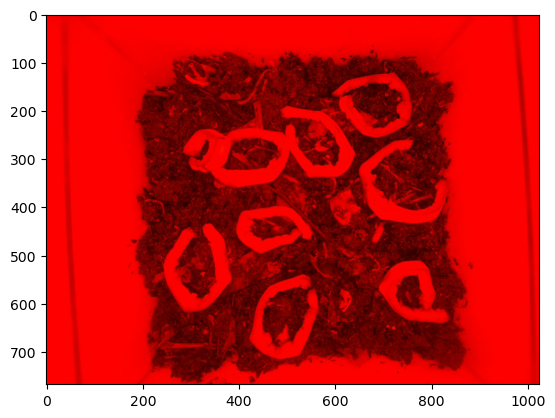

In [4]:
plt.imshow(img6RGB)

## Movement with createBackgroundSubtractorMOG2

In [5]:
backSub = cv2.createBackgroundSubtractorMOG2()

In [6]:
fgMask = backSub.apply(img1Gray)
fgMask = backSub.apply(img2Gray)
fgMask = backSub.apply(img3Gray)
fgMask = backSub.apply(img4Gray)
fgMask = backSub.apply(img5Gray)
fgMask = backSub.apply(img6Gray)

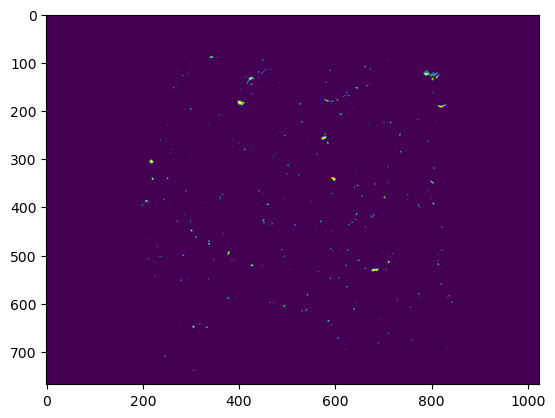

In [7]:
plt.imshow(fgMask)

## Movement with createBackgroundSubtractorKNN

In [8]:
backSub = cv2.createBackgroundSubtractorKNN()

In [9]:
fgMask = backSub.apply(img1Gray)
fgMask = backSub.apply(img2Gray)
fgMask = backSub.apply(img3Gray)
fgMask = backSub.apply(img4Gray)
fgMask = backSub.apply(img5Gray)
fgMask = backSub.apply(img6Gray)

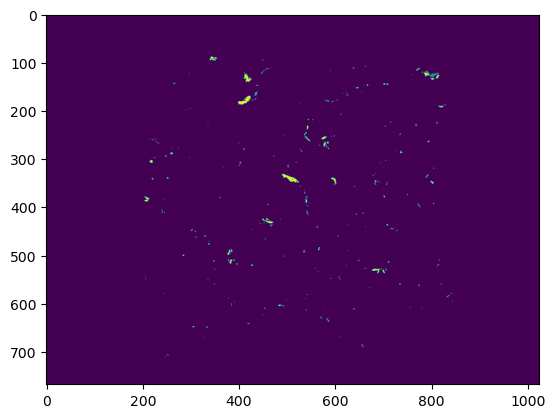

In [10]:
plt.imshow(fgMask)

## Applying contours

In [11]:
blur = cv2.GaussianBlur(fgMask, (11, 11), 0)

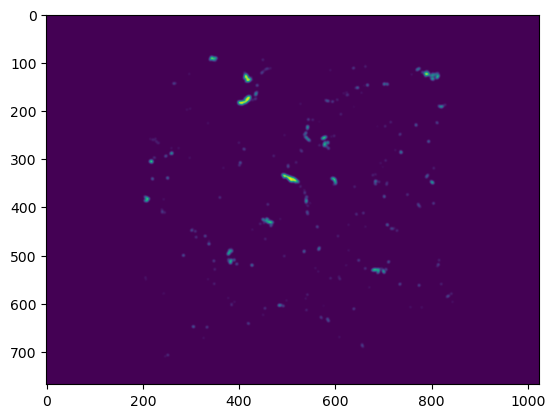

In [12]:
plt.imshow(blur)

In [13]:
canny = cv2.Canny(blur, 30, 150, 3)

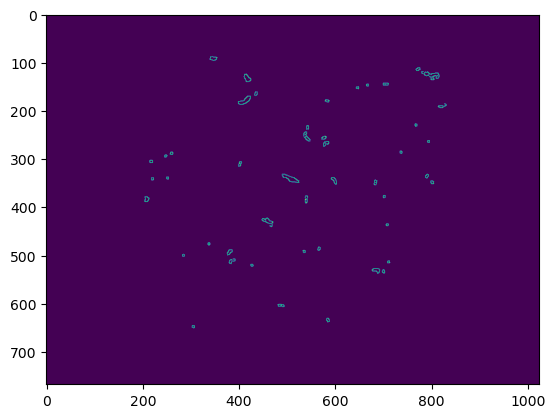

In [14]:
plt.imshow(canny)

In [15]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)

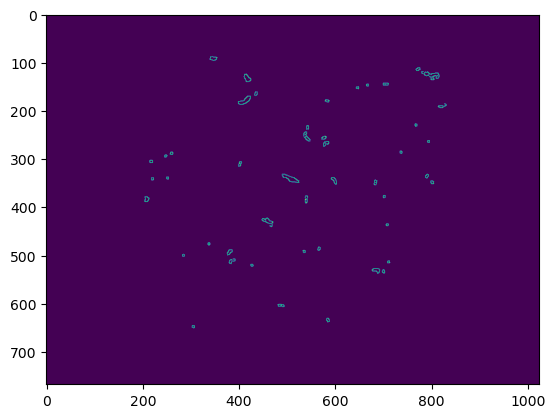

In [16]:
plt.imshow(dilated)

In [17]:
(contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [18]:
res = cv2.drawContours(img6BGR, contours, -1, (255, 0, 0), 1)

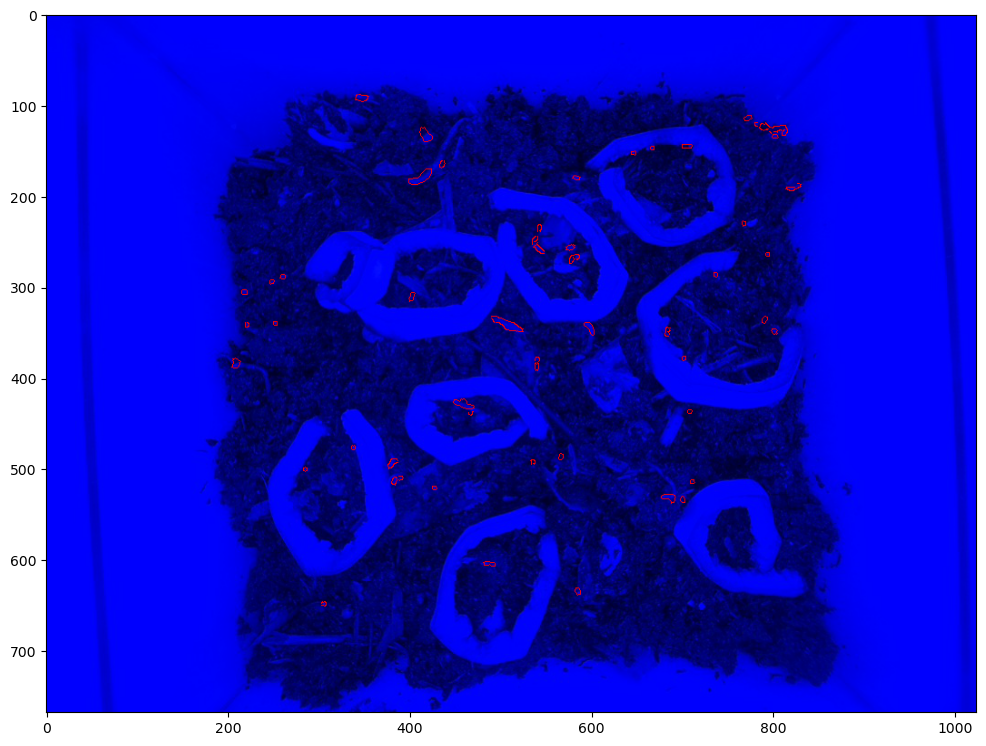

In [19]:
display(img6BGR)

## Mask all moving objects

In [20]:
imgMaskMovingObjects = cv2.imread('./input/images/2023-05-11_1953.jpg', 0)
imgContourMovingObjects = cv2.imread('./input/images/2023-05-11_1953.jpg', 0)

In [21]:
cv2.drawContours(imgContourMovingObjects, contours, -1, (255, 0, 0), 1)

array([[73, 73, 73, ..., 76, 76, 76],
       [73, 73, 73, ..., 76, 76, 76],
       [72, 73, 73, ..., 76, 76, 76],
       ...,
       [76, 76, 76, ..., 69, 71, 72],
       [76, 76, 76, ..., 69, 71, 72],
       [76, 76, 76, ..., 69, 71, 72]], dtype=uint8)

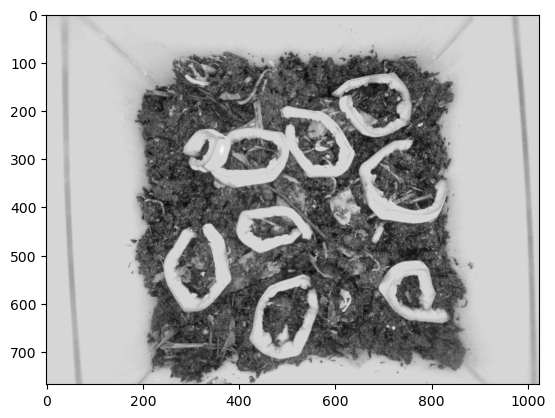

In [22]:
plt.imshow(imgMaskMovingObjects, cmap='gray')

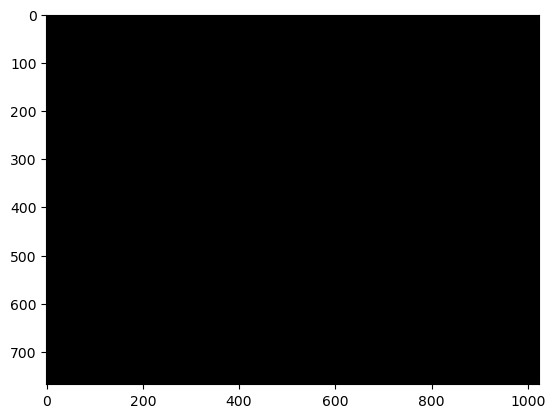

In [23]:
maskAll = np.zeros_like(imgMaskMovingObjects)
plt.imshow(maskAll, cmap='gray')

In [24]:
cv2.drawContours(maskAll, contours, -1, 255, -1)
print('create mask')

create mask


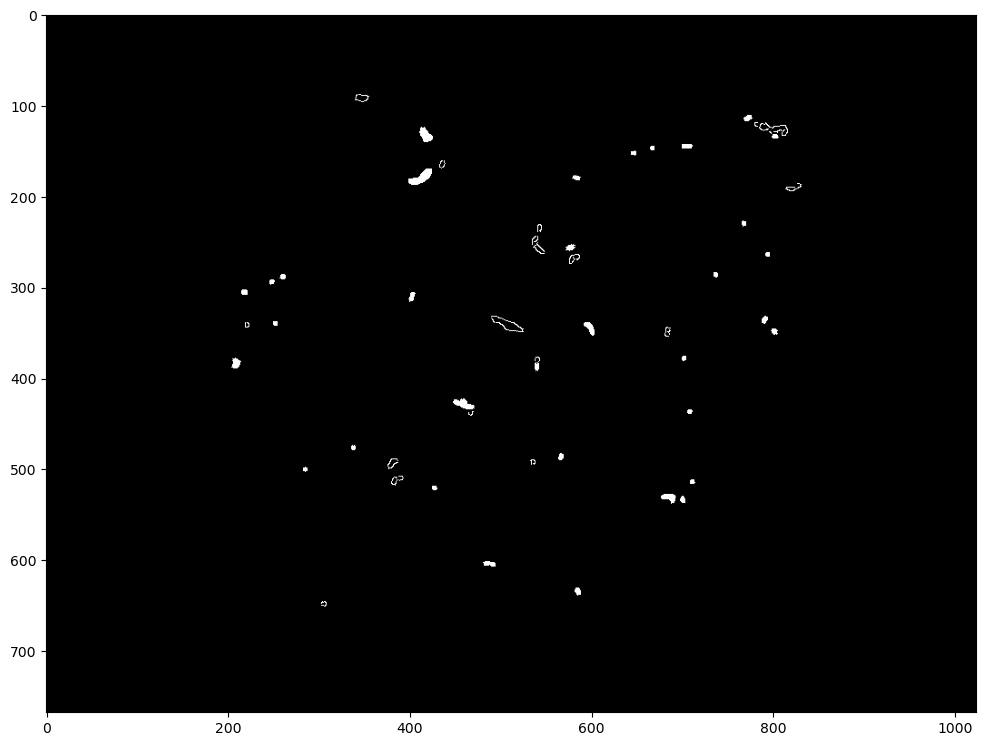

In [25]:
display(maskAll, cmap='gray')

In [26]:
outAll = np.zeros_like(imgMaskMovingObjects)
outAll[maskAll == 255] = imgMaskMovingObjects[maskAll == 255]

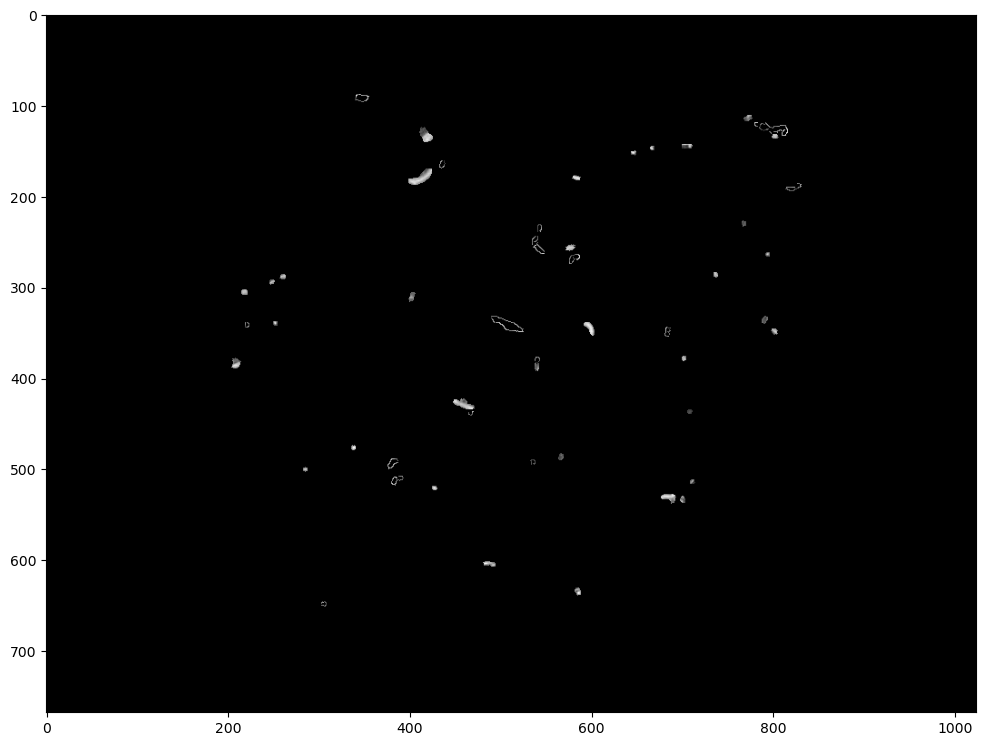

In [27]:
display(outAll, cmap='gray')

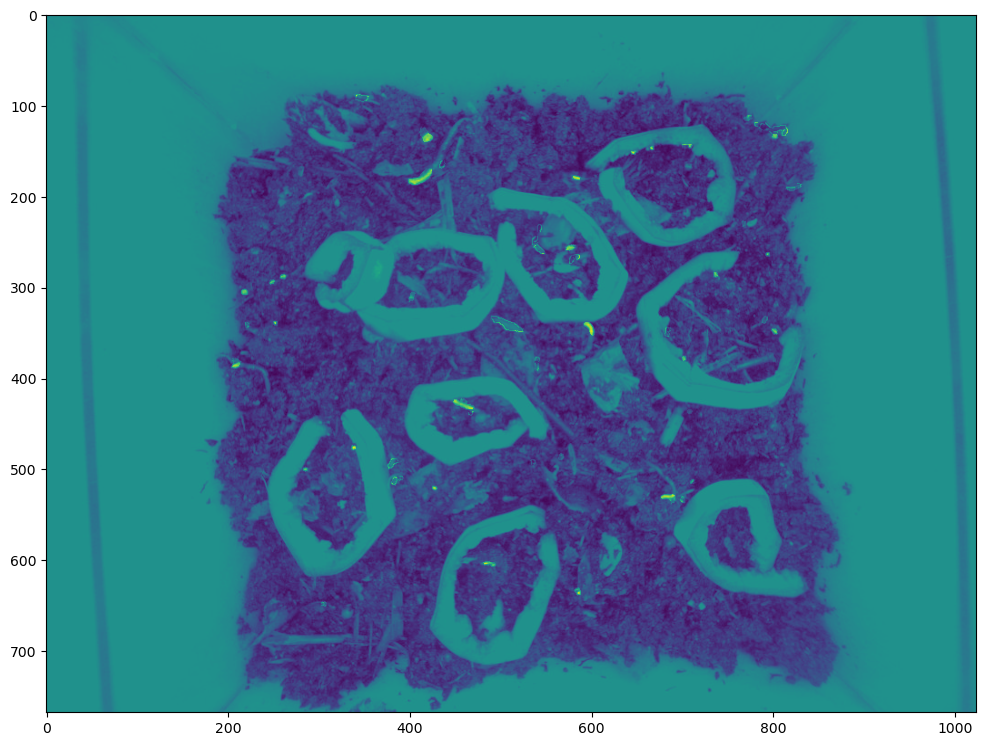

In [28]:
contrast = 1.8 # Contrast control ( 0 to 127)
brightness = 1.8 # Brightness control (0-100)

out2All = np.zeros_like(imgMaskMovingObjects)

# change brightness

out2All[maskAll != 255] = imgMaskMovingObjects[maskAll != 255]
lighterImage = cv2.addWeighted( imgMaskMovingObjects, contrast, imgMaskMovingObjects, 0, brightness)
out2All[maskAll == 255] = lighterImage[maskAll == 255]

display(out2All)

## Mask one moving object

In [29]:
imgToCutOut = cv2.imread('./input/images/2023-05-11_1953.jpg', 0)

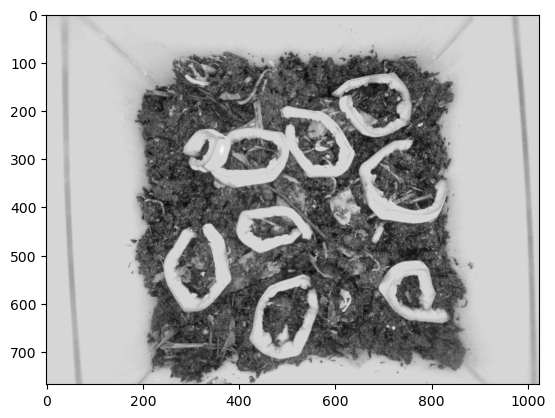

In [30]:
plt.imshow(imgToCutOut, cmap='gray')

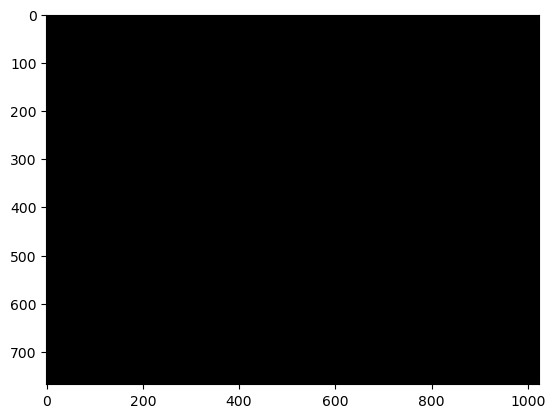

In [31]:
mask = np.zeros_like(imgToCutOut)
plt.imshow(mask, cmap='gray')

In [32]:
cv2.drawContours(mask, contours, 2, 255, -1)
print('create mask at index 2')

create mask at index 2


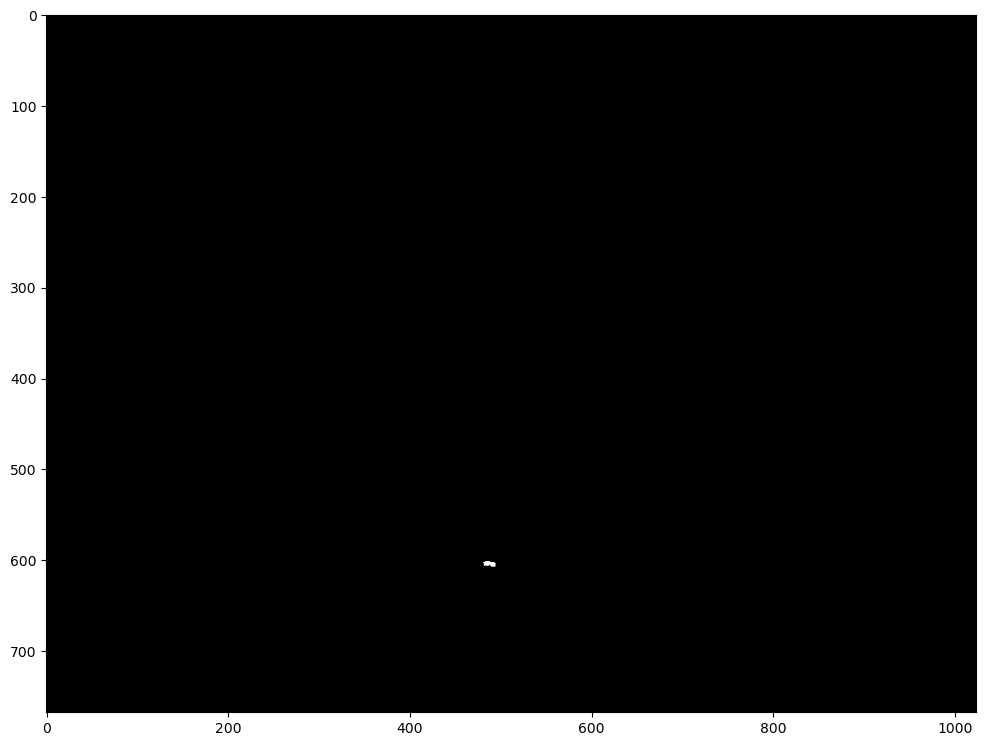

In [33]:
display(mask, cmap='gray')

In [34]:
out = np.zeros_like(imgToCutOut)
out[mask == 255] = imgToCutOut[mask == 255]

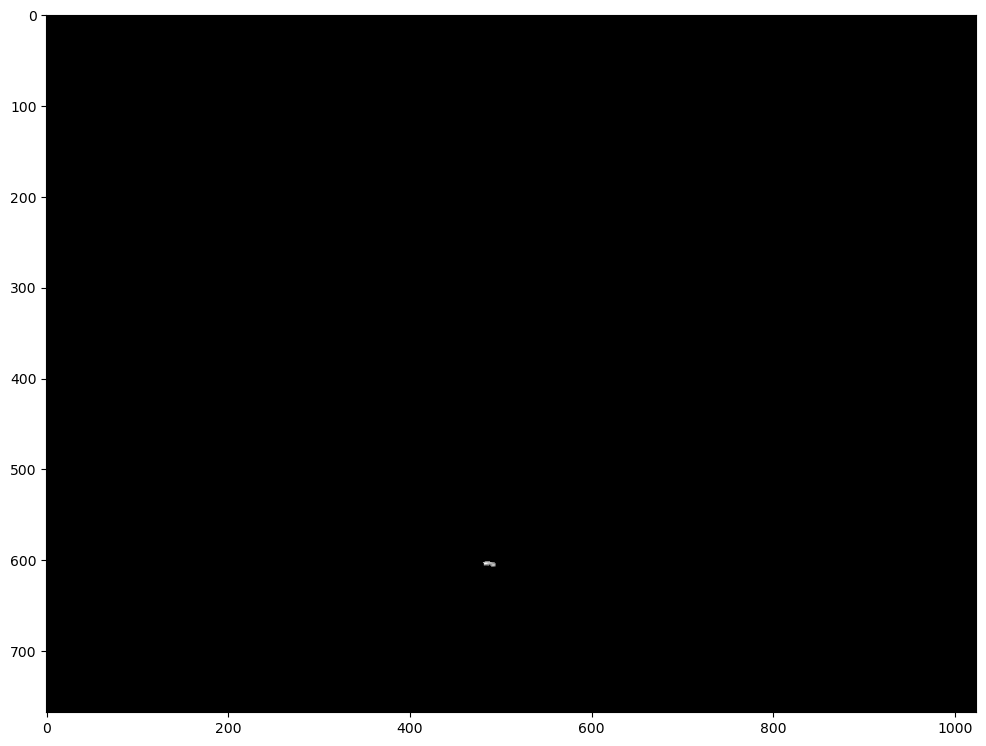

In [35]:
display(out, cmap='gray')

## Draw bounding box around contours

In [632]:
img6BGR_Box_One_Dimension = cv2.imread('./input/images/2023-05-11_1953.jpg', 0)
img6BGR_Box = cv2.imread('./input/images/2023-05-11_1953.jpg')
img6Gray_Box = cv2.cvtColor(img6BGR, cv2.COLOR_BGR2GRAY)
img6RGB_Box = cv2.cvtColor(img6BGR, cv2.COLOR_BGR2RGB)

before = cv2.imread('./input/images/2023-05-11_1946.jpg')
now = cv2.imread('./input/images/2023-05-11_1953.jpg')
after = cv2.imread('./input/images/2023-05-11_2000.jpg')

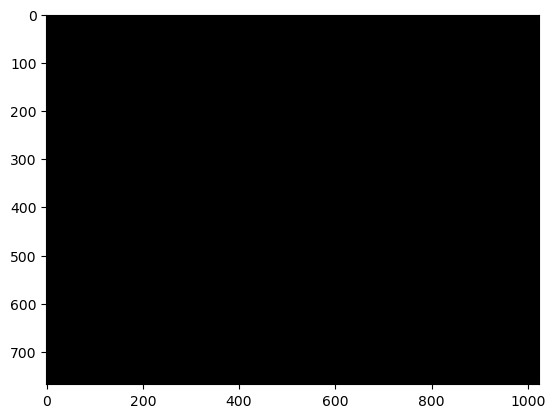

In [633]:
maskBoudingBox = np.zeros_like(img6BGR_Box)
plt.imshow(maskBoudingBox, cmap='gray')

In [634]:
from skimage.metrics import structural_similarity

In [635]:
height, width, _ = img6BGR_Box.shape
min_x, min_y = width, height
max_x = max_y = 0

now_Box_Contours = now.copy()

def crop(image):
    cY = int(y+(h/2))
    cX = int(x+(w/2))
    imageSize = 80
    return image[cY-imageSize:cY+imageSize, cX-imageSize:cX+imageSize]

def timeLine(before, now, after):
    vis = np.concatenate((before, now, after), axis=1)
    return vis

def diff(before, after):
    beforeGray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    nowGray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
    diff = 255 - cv2.absdiff(beforeGray, nowGray)
    return diff

def diffSki(before, after):
    before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
    after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
    (score, diff) = structural_similarity(before_gray, after_gray, full=True)
    diff = (diff * 255).astype("uint8")
    return diff

for index, contour in enumerate(contours):
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(maskBoudingBox, (x,y), (x+w,y+h), (255, 255, 255), -1)
    cv2.rectangle(now_Box_Contours, (x,y), (x+w,y+h), (255, 0, 0), 1)
    # Save data
    beforeCrop = crop(before)
    nowCrop = crop(now)
    afterCrop = crop(after)
    cv2.imwrite('./data/training/worms/'+str(index)+'.jpg', nowCrop) # single image
    cv2.imwrite('./data/training/worms/'+str(index)+'_timeline.jpg', timeLine(beforeCrop, nowCrop, afterCrop))
    cv2.imwrite('./data/training/worms/'+str(index)+'_diff.jpg', diff(beforeCrop, nowCrop))
    cv2.imwrite('./data/training/worms/'+str(index)+'_diffSki.jpg', diffSki(beforeCrop, nowCrop))

## Diff with Skimage

In [636]:

before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)

# Compute SSIM between the two images
(score, diff) = structural_similarity(before_gray, after_gray, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")
diff_box = cv2.merge([diff, diff, diff])

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(before.shape, dtype='uint8')
filled_after = after.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

Image Similarity: 95.6972%


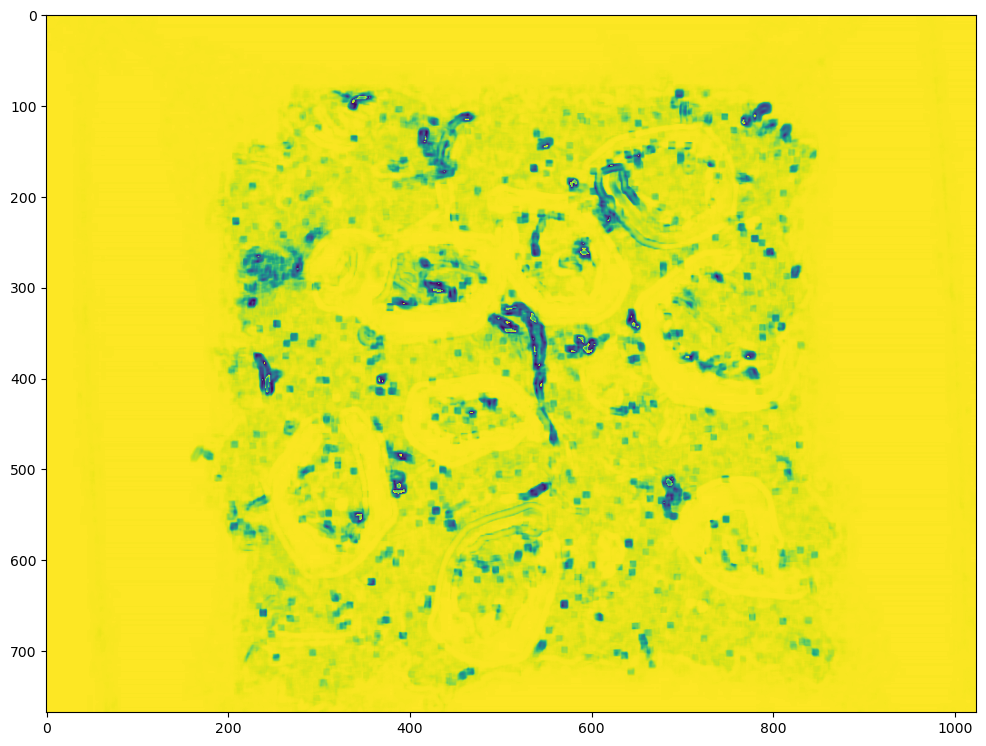

In [637]:
display(diff)

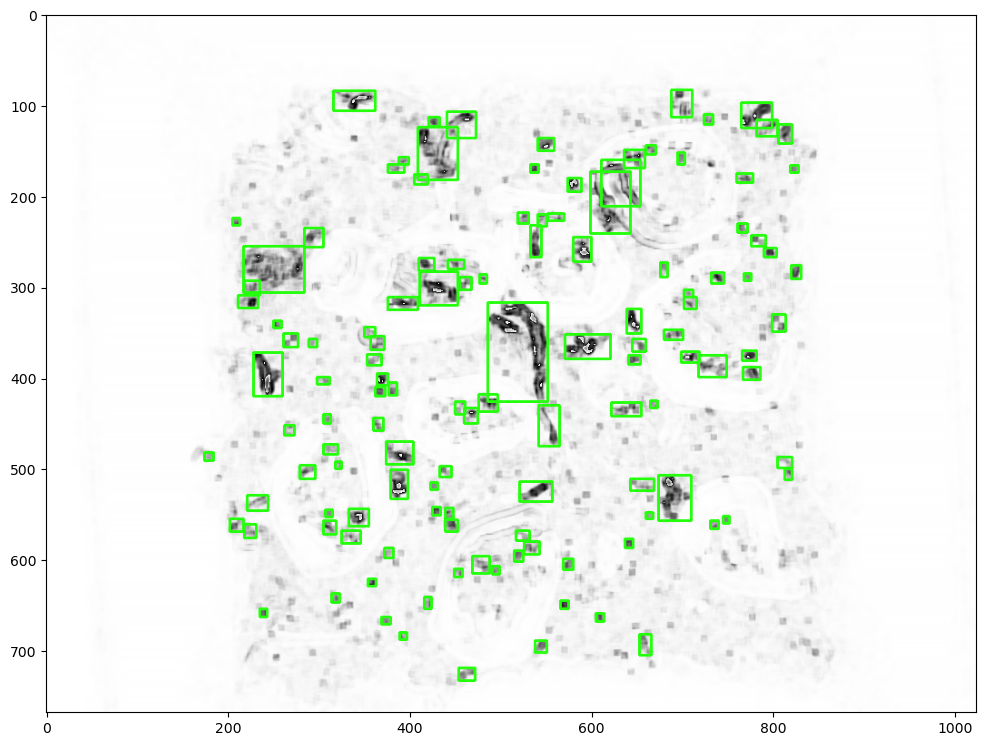

In [638]:
display(diff_box)

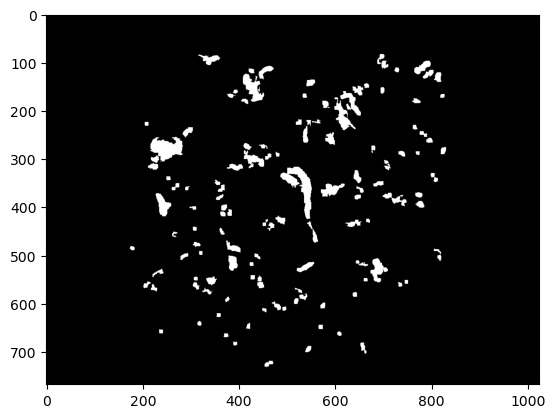

In [639]:
plt.imshow(mask)

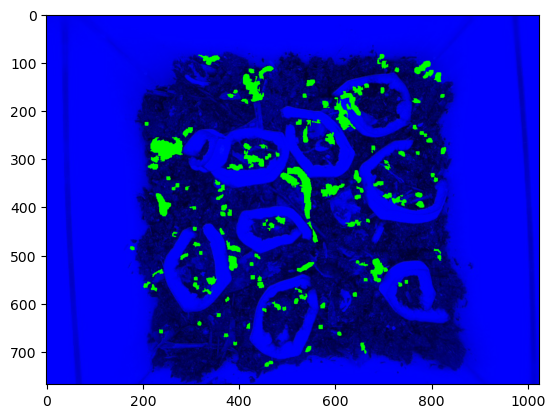

In [640]:
plt.imshow(filled_after)

### Cut out images (2 before, current, 2 after)

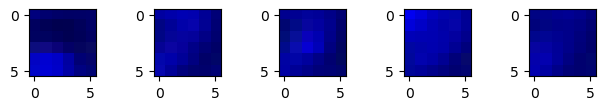

In [212]:
f, axarr = plt.subplots(1,5)
f.tight_layout()
index = 8
axarr[0].imshow(cutoutsImg4[index])
axarr[1].imshow(cutoutsImg5[index])
axarr[2].imshow(cutoutsImg6[index])
axarr[3].imshow(cutoutsImg7[index])
axarr[4].imshow(cutoutsImg8[index])

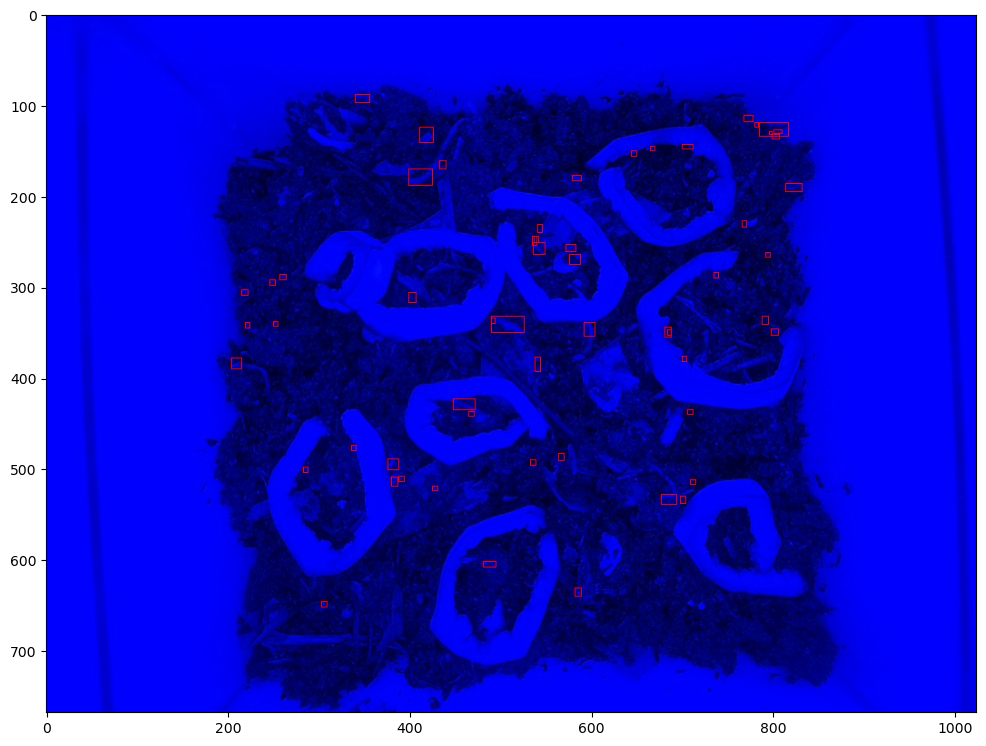

In [118]:
display(img6BGR_Box_Contours)

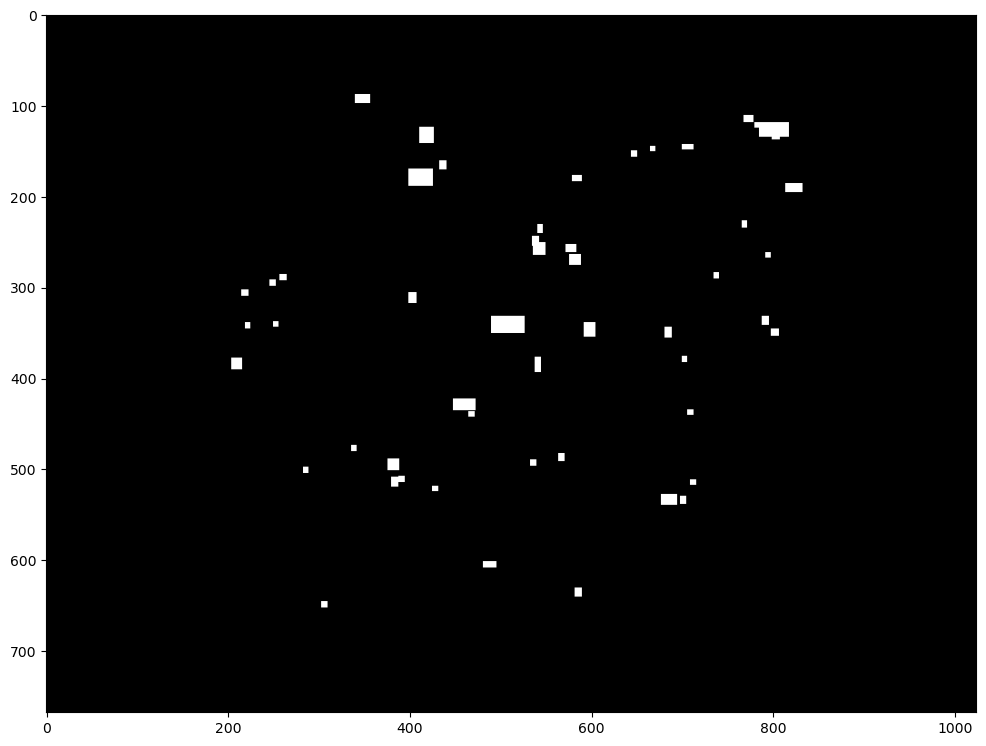

In [119]:
display(maskBoudingBox)

In [123]:
maskBoudingBox.shape

(768, 1024, 3)

In [124]:
img6BGR_Box.shape

(768, 1024, 3)

In [125]:
maskBoudingBoxOneDimension = cv2.cvtColor(maskBoudingBox, cv2.COLOR_RGB2GRAY)

In [126]:
maskBoudingBoxOneDimension.shape

(768, 1024)

In [130]:
boxesCutOut = cv2.bitwise_and(img6BGR_Box,img6BGR_Box,mask = maskBoudingBoxOneDimension)

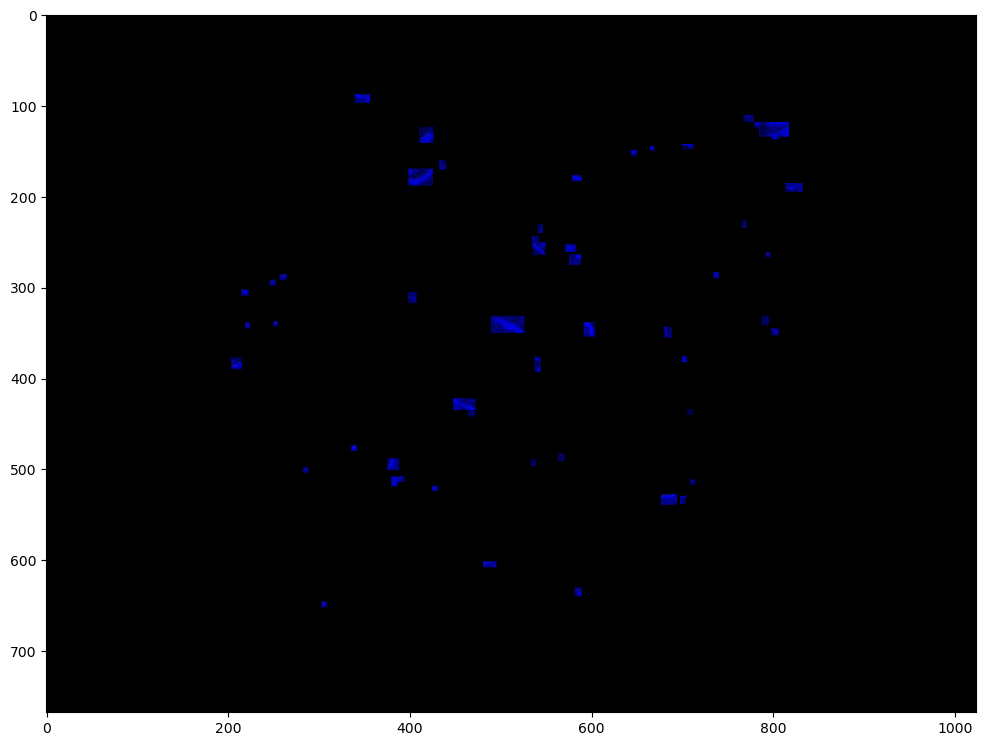

In [209]:
display(boxesCutOut, cmap='jet')

# Unsupervised K-means clustering

Differentiate:
- soil moving
- small white dots
- food
- worms

Possible params:
- color
- size contour
- shape contour
- image cut out
- movement

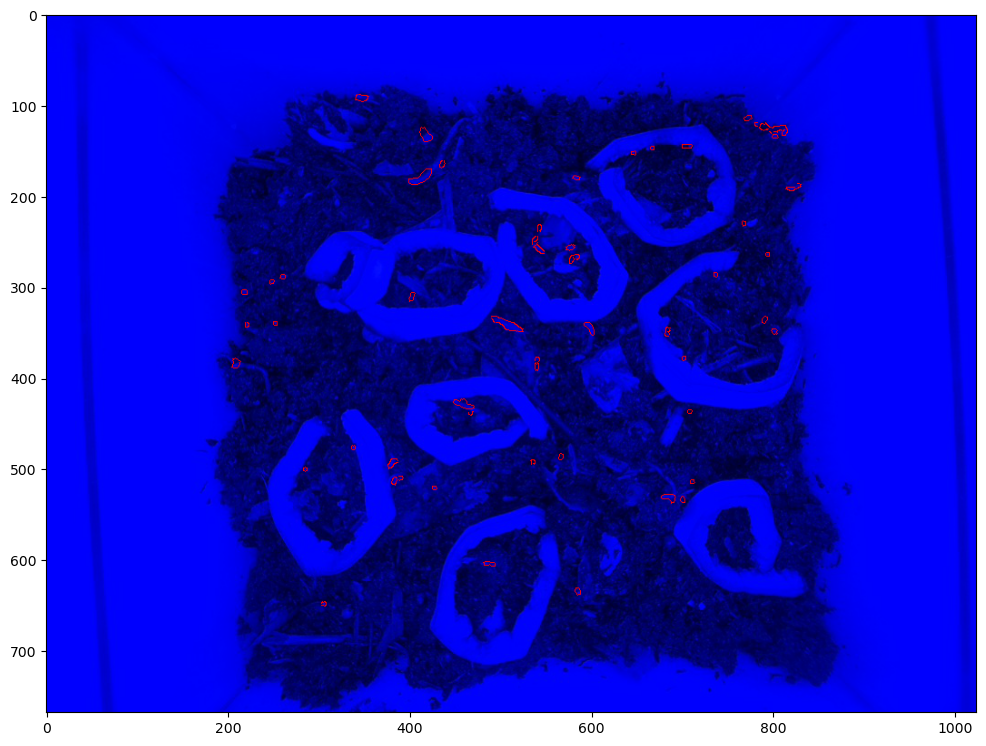

In [36]:
display(img6BGR)

# Supervised CCN clustering

In [529]:
wormGRB = cv2.imread('./data/training/worms/2.jpg') 
wormRGB = cv2.cvtColor(wormGRB, cv2.COLOR_BGR2RGB)

In [530]:
from keras.preprocessing.image import ImageDataGenerator

In [531]:
image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

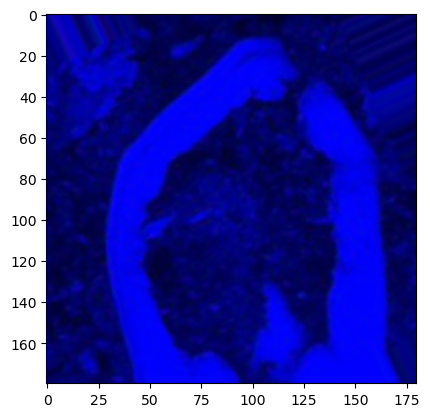

In [532]:
plt.imshow(image_gen.random_transform(wormGRB))

In [515]:
res = tf.keras.utils.image_dataset_from_directory('./outputs/cutouts')

NotFoundError: Could not find directory ./outputs/cutouts

In [472]:
#res.load_data()

AttributeError: 'BatchDataset' object has no attribute 'load_data'

In [473]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])